In [1]:
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

# Prettier plotting with seaborn
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
## set working directory

os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

In [3]:
# Define relative paths to DTM and DSM files
dtm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DTM.tif")

dsm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DSM.tif")

# Open DTM and DSM files
pre_lidar_dtm = rxr.open_rasterio(dtm_path, masked=True).squeeze()
pre_lidar_dsm = rxr.open_rasterio(dsm_path, masked=True).squeeze()

# Create canopy height model (CHM)
pre_lidar_chm = pre_lidar_dsm - pre_lidar_dtm
pre_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)>
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.960083  ],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.6400146 ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

In [4]:
# View min and max values in the data
print('CHM min value:', np.nanmin(pre_lidar_chm))
print('CHM max value:', np.nanmax(pre_lidar_chm))

CHM min value: 0.0
CHM max value: 26.930054


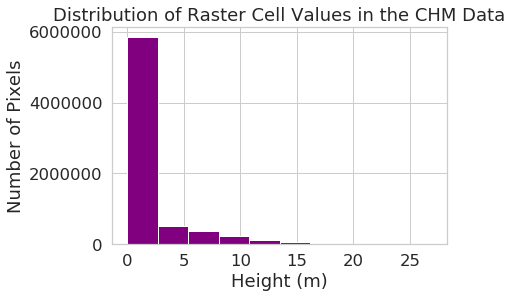

In [5]:
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values in the CHM Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

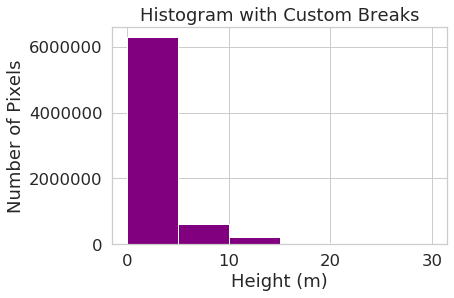

In [6]:
# Histogram with custom breaks
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="purple",
                        bins=[0, 5, 10, 15, 20, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

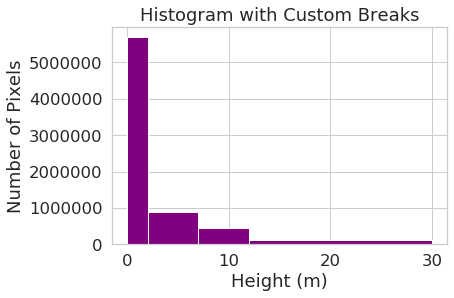

In [7]:
# Histogram with custom breaks
f, ax = plt.subplots()

pre_lidar_chm.plot.hist(
    color='purple',
    bins=[0, 2, 7, 12, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

In [8]:
# First, Check nodata value for your array
pre_lidar_chm.rio.nodata

In [9]:
##These lines return the min and max values, ignoring an NA values
data_min_value = np.nanmin(pre_lidar_chm)
data_max_value = np.nanmax(pre_lidar_chm)
print(data_min_value, data_max_value)

0.0 26.930054


In [10]:
##Set our bins
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [11]:
##Here we're using the xarray library to apply numpy's digitize function
##this code creates a new object (pre_lidar_chm_class) by applying digitize to our former object (pre_lidar_chm)
##using the class_bins we designated above

pre_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     pre_lidar_chm,
                                     class_bins)

/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1344: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(x.dtype, str):
/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1395: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(v.dtype, str):


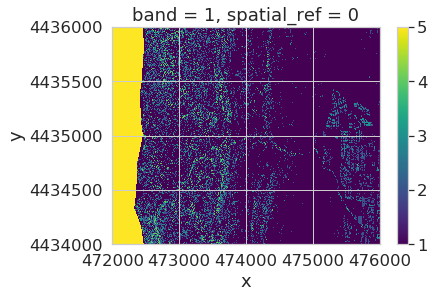

In [12]:
## Here, we're using the plot.imshow() function to plot our raster as an image
## Values of 5 represent missing data
im = pre_lidar_chm_class.plot.imshow()
ax.set_axis_off()

In [13]:
# Mask out values not equalt to 5
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class != 5)
pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)>
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int64 1
  * x            (x) float64 4.72e+05 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 0

/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1344: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(x.dtype, str):
/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1395: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(v.dtype, str):


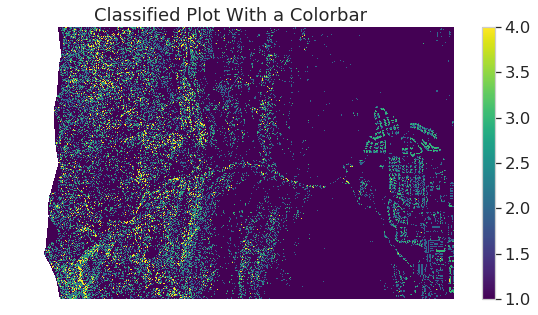

In [14]:
# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_ma.plot.imshow()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

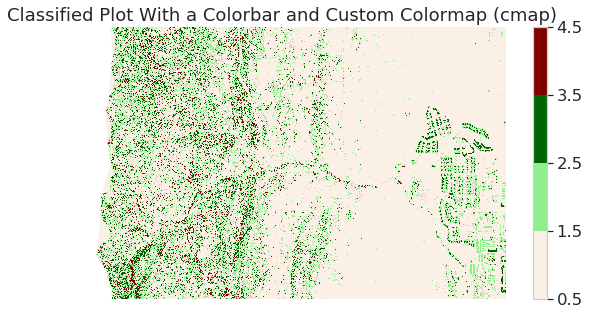

In [15]:
# Plot data using nicer colors
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, 
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap)")
ax.set_axis_off()
plt.show()

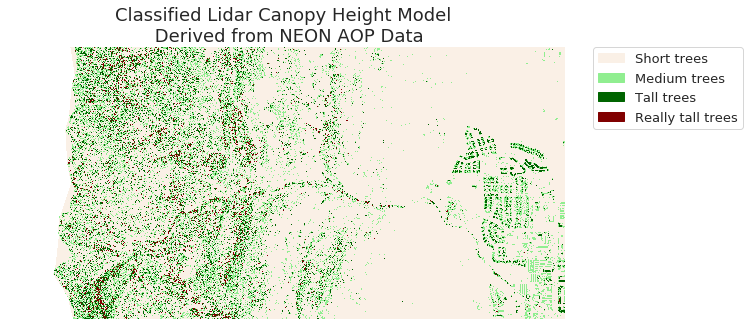

In [16]:
# Create a list of labels to use for your legend
height_class_labels = ["Short trees",
                       "Medium trees",
                       "Tall trees",
                       "Really tall trees"]

# Create a colormap from a list of colors
colors = ['linen',
          'lightgreen',
          'darkgreen',
          'maroon']

cmap = ListedColormap(colors)

class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins,
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
im = pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        # Turn off colorbar
                                        add_colorbar=False)
# Add legend using earthpy
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Model \n Derived from NEON AOP Data")
ax.set_axis_off()
plt.show()

## Q3

In [17]:
# Define relative paths to post-flood DTM and DSM files
post_dtm_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "post-flood",
                             "lidar",
                             "post_DTM.tif")

post_dsm_path = os.path.join("colorado-flood",
                             "spatial",
                             "boulder-leehill-rd",
                             "post-flood",
                             "lidar",
                             "post_DSM.tif")

# Open post-flood DTM and DSM files
post_lidar_dtm = rxr.open_rasterio(post_dtm_path, masked=True).squeeze()
post_lidar_dsm = rxr.open_rasterio(post_dsm_path, masked=True).squeeze()

# Calculate post-flood canopy height model (CHM)
post_lidar_chm = post_lidar_dsm - post_lidar_dtm

# Now I can calculate the difference between pre-flood and post-flood CHMs
delta_chm = pre_lidar_chm - post_lidar_chm

I first define the relative paths to the post-flood Digital Terrain Model (DTM) and Digital Surface Model (DSM) files. These paths point to where the respective raster files are located.

Using the rxr.open_rasterio() function, I then open the post-flood DTM and DSM files. This function reads the raster data and returns it as an xarray data structure, which is convenient for further analysis. I also ensure that any 'no data' values are masked out by setting masked=True.

With the DTM and DSM for the post-flood scenario now loaded, I calculate the post-flood Canopy Height Model (CHM) by subtracting the DTM from the DSM. The CHM essentially represents the height of the forest canopy by measuring the difference between the ground surface (DTM) and the top of the vegetative structure (DSM).

Finally, I compute the difference between the pre-flood and post-flood CHMs. This difference, stored in delta_chm, will provide insights into how the canopy height changed as a result of the flood.

In [18]:
# Classify changes
delta_chm_class = xr.apply_ufunc(np.digitize, delta_chm, [-np.inf, -0.1, 0.1, np.inf])
colors = ['red', 'white', 'green']  # Negative change, No change, Positive change
class_labels = ["Decrease", "No Change", "Increase"]

I use the xr.apply_ufunc() function to classify the changes in the delta_chm dataset. Specifically, I'm categorizing the changes into three classes:

Decrease, No change, Increase in canopy height
The boundaries I set for classification are:

Values less than -0.1 are considered a decrease, Values between -0.1 and 0.1 are considered no change, Values greater than 0.1 are considered an increase

I assign a color to each class for visualization:

red for decrease, white for no change, green for increase

I also define labels for each class (class_labels). These labels will be used when creating a legend in the visualization to provide context to the viewer.

lastly, I'm preparing the delta_chm data for a meaningful visualization that clearly distinguishes between areas of increase, decrease, and no change in canopy height due to the flood event.

/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1344: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(x.dtype, str):
/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1395: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(v.dtype, str):


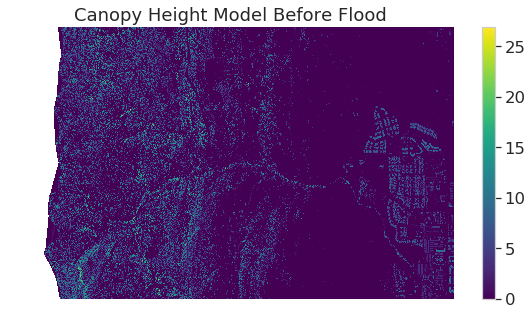

In [19]:
# CHM before flood
f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_chm.plot.imshow()
ax.set(title="Canopy Height Model Before Flood")
ax.set_axis_off()
plt.show()

I start by creating a figure and axis object for the plot using plt.subplots(). I specify a size for the figure to ensure it's clearly visible.

I use the plot.imshow() function from xarray to visualize the pre_lidar_chm dataset, which represents the Canopy Height Model (CHM) before the flood. This function will display the dataset as an image where different pixel values (canopy heights) are represented with different colors.

I set a title for the plot with ax.set(title="Canopy Height Model Before Flood") to provide context for the viewer about what the visualization represents.
I use ax.set_axis_off() to turn off the axis, providing a cleaner look to the image.

lastly, I used plt.show() to display the visualization.

It shows the canopy height model before flood

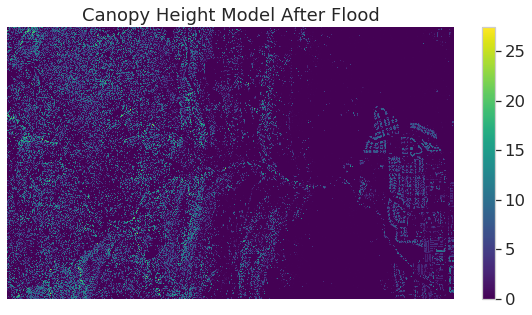

In [20]:
# CHM after flood
f, ax = plt.subplots(figsize=(10, 5))
post_lidar_chm.plot.imshow()
ax.set(title="Canopy Height Model After Flood")
ax.set_axis_off()
plt.show()

I initiate the creation of a figure and its associated axis using the plt.subplots() function. The specified size ensures that the resulting visualization is adequately large and easy to interpret.

With the plot.imshow() method from xarray, I render the post_lidar_chm dataset, which is the Canopy Height Model (CHM) after the flood. This method displays the dataset in the form of an image, where different shades represent various canopy heights.

The title of the plot is set using ax.set(title="Canopy Height Model After Flood"), which informs the viewer of the specific timeframe of the data—after the flood.
I then employ ax.set_axis_off() to remove the axis, offering a more streamlined and uncluttered visual. the entire visualization is displayed with plt.show().

from the plot, I can't really clearly see the difference between before the flood and after the floor, so I began to plot out their differences of changes

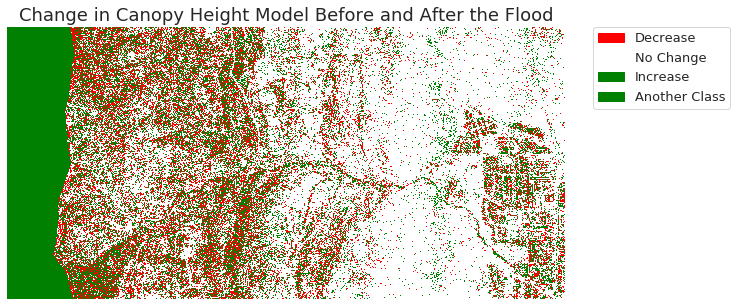

In [22]:
# Classified change in CHM
f, ax = plt.subplots(figsize=(10, 5))
im = delta_chm_class.plot.imshow(cmap=ListedColormap(colors), add_colorbar=False)
ep.draw_legend(im, titles=class_labels)
ax.set(title="Change in Canopy Height Model Before and After the Flood")
ax.set_axis_off()
plt.show()

I begin by establishing a figure and its associated axis using the plt.subplots() function. The defined size ensures the visualization is spacious for clear interpretation.

I use the delta_chm_class.plot.imshow() method to display the classified changes (increase, decrease, no change) in canopy height. The cmap=ListedColormap(colors) parameter applies a custom colormap, which is defined by the colors list. I've chosen not to include the default colorbar with add_colorbar=False, as I intend to add a custom legend later.

Utilizing the ep.draw_legend() function from the earthpy library, I add a custom legend to the visualization. The legend will contain labels (e.g., "Decrease", "No Change", "Increase") corresponding to the distinct classes of changes in canopy height.  I set a title for the visualization with ax.set(title="Change in Canopy Height Model Before and After the Flood"), indicating that it showcases the differences in CHM before and after the flood.
I use ax.set_axis_off() to hide the axis, ensuring the visualization is clean and focused solely on the data. then I plotted the plot

Based on the observed differences, there is a more pronounced decrease than increase in the canopy height model before and after the flood. While the areas of increase are more dispersed, the decreases are more concentrated.

In [23]:
# Calculate the difference between pre-flood and post-flood DTMs
delta_dtm = pre_lidar_dtm - post_lidar_dtm

# Classify the changes
# A change greater than 0.1 meters is a rise, less than -0.1 meters is a decrease in terrain.
delta_dtm_class = xr.apply_ufunc(np.digitize, delta_dtm, [-np.inf, -0.1, 0.1, np.inf])

I start by computing the difference between the pre-flood and post-flood Digital Terrain Models (DTMs). The result, delta_dtm, represents the change in terrain elevation after the flood, with positive values indicating a rise and negative values indicating a decrease in terrain elevation.

Next, I move on to classifying these differences into distinct categories: Using xr.apply_ufunc() combined with np.digitize(), I classify the changes in the delta_dtm data.
I define the classification thresholds as follows:
Any change less than -0.1 meters is categorized as a decrease in terrain.
Any change between -0.1 and 0.1 meters is considered negligible or no significant change.
Any change greater than 0.1 meters is categorized as a rise in terrain.
The result, delta_dtm_class, provides a classified representation of terrain changes, where each class represents a specific type of change (rise, no change, or decrease).


In [24]:
# Define colors and labels for plotting
colors = ['blue', 'white', 'orange']  # Decrease in terrain, No change, Increase in terrain
class_labels = ["Decrease", "No Change", "Increase"]

I am defining specific colors and labels that will be used for visualizing the classified changes in the Digital Terrain Models (DTMs).

blue: Represents areas where there was a decrease in terrain height.
white: Represents areas where there was no significant change in terrain height.
orange: Represents areas where there was an increase in terrain height.

These are textual labels corresponding to each of the color-coded categories. They serve as descriptors when visualizing the data:
"Decrease": Indicates a reduction in terrain elevation.
"No Change": Denotes areas where the terrain elevation remained relatively unchanged.
"Increase": Indicates a rise in terrain elevation.

/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1344: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(x.dtype, str):
/opt/conda/lib/python3.7/site-packages/xarray/plot/plot.py:1395: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(v.dtype, str):


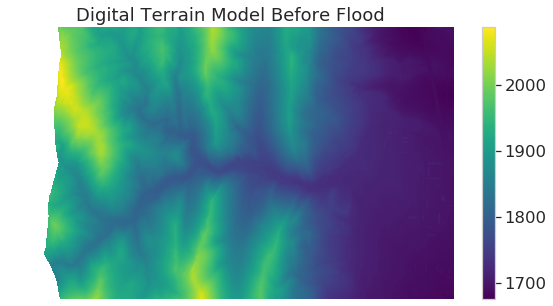

In [25]:
# DTM before flood
f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_dtm.plot.imshow()
ax.set(title="Digital Terrain Model Before Flood")
ax.set_axis_off()
plt.show()

I am creating a visualization to display the Digital Terrain Model (DTM) of the area before the flood event took place. Using the plt.subplots() function, I initialize a figure and axis for the plot. The size of the figure is set to be 10 units in width and 5 units in height. I use the plot.imshow() method to display the pre_lidar_dtm data, which represents the DTM before the flood. This produces an image where each pixel value corresponds to the terrain elevation at that location. I set the title of the plot to "Digital Terrain Model Before Flood" using ax.set(title="...") to provide context to the viewer about the content of the visualization. I also remove any axis markings and labels using ax.set_axis_off() to make the visualization cleaner and more focused on the DTM data. 

from the plot, there is the tendency that higher terrain in the west and south region, which is above 2000

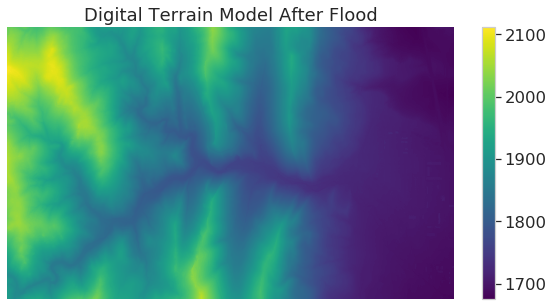

In [26]:
# DTM after flood
f, ax = plt.subplots(figsize=(10, 5))
post_lidar_dtm.plot.imshow()
ax.set(title="Digital Terrain Model After Flood")
ax.set_axis_off()
plt.show()

I am creating a visualization to display the Digital Terrain Model (DTM) of the area after the flood event took place. I initialize a figure and axis for the plot using the plt.subplots() function. The specified size for this visualization is 10 units in width by 5 units in height. Using the plot.imshow() method, I display the post_lidar_dtm data. This represents the DTM after the flood, and by rendering it, I produce an image where the color of each pixel corresponds to the elevation of the terrain at that specific location. To provide context to the viewer, I set the title of the plot as "Digital Terrain Model After Flood" using the ax.set(title="...") function.

For a cleaner visualization that focuses solely on the DTM data, I use ax.set_axis_off() to remove any axis labels and markings.

from the plot, it is hard to find out any differences from before the flood and after the flood.

[1 2 3 4]


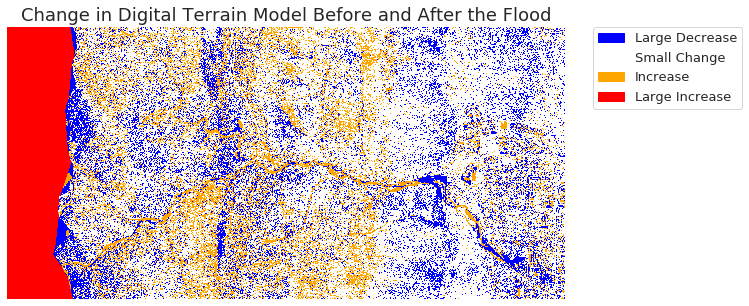

In [28]:
# Check the unique classes in the delta_dtm_class
unique_classes = np.unique(delta_dtm_class)
print(unique_classes)

# Adjusting the colors and labels based on the unique classes
if len(unique_classes) == 4:
    colors = ['blue', 'white', 'orange', 'red']
    class_labels = ["Large Decrease", "Small Change", "Increase", "Large Increase"]
elif len(unique_classes) == 3:
    colors = ['blue', 'white', 'orange']
    class_labels = ["Decrease", "No Change", "Increase"]

# Now, let's try plotting the change
f, ax = plt.subplots(figsize=(10, 5))
im = delta_dtm_class.plot.imshow(cmap=ListedColormap(colors), add_colorbar=False)
ep.draw_legend(im, titles=class_labels)
ax.set(title="Change in Digital Terrain Model Before and After the Flood")
ax.set_axis_off()
plt.show()


I am checking the unique classifications of terrain changes between the pre-flood and post-flood DTMs and subsequently visualizing these changes. Using the np.unique() function, I identify and store the unique classes present in the delta_dtm_class into the unique_classes variable. I then print these unique classes to understand the types of changes the terrain has undergone. I create a conditional structure to customize the colors and labels for the visualization based on the unique classes identified. If there are four unique classes, I include an extra category for "Large Increase" and assign corresponding colors and labels. If there are three unique classes, I utilize the predefined colors and labels for "Decrease," "No Change," and "Increase." I initialize a figure and axis for the plot. Using the plot.imshow() method and the customized colors, I display the delta_dtm_class data. This visualization shows the changes in the terrain between the pre-flood and post-flood periods. To provide a legend that helps interpret the data, I use the ep.draw_legend() function and assign it the customized class labels. I set the title of the plot to "Change in Digital Terrain Model Before and After the Flood" to give context to the viewer. For a focused visualization, I remove the axis labels and markings using ax.set_axis_off().

As I can see from the plot, it's evident that there's a predominant trend of large decreases compared to significant increases in the terrain model before and after the flood. This underscores the profound impact of the flood on the terrain's morphology.